# Exercise 5 

## Done by: Ng Jia Jie

## Problem 1 : Predicting CentralAir using SalePrice

#### Import Libraries

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
sb.set()

In [2]:
houseData = pd.read_csv('train.csv')
houseData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


##### Question part ai) 
Plot the binary distribution of houseData['CentralAir'] using catplot to check the ratio of Y against N. Note that the classes Y and N are quite unbalanced; do you think this will create any problem in our Classification?

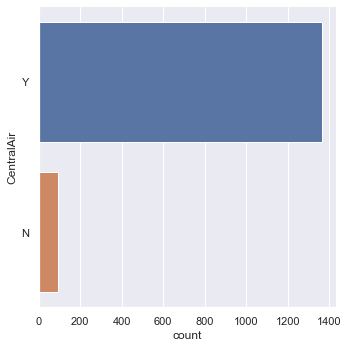

In [3]:
sb.catplot(y = 'CentralAir', data = houseData, kind = "count")

The unbalanced classes are undesirable for a classification problem. Most machine learning algorithms assume data is distributed equally. When we have a imbalance of a class, the machine learning classifier tends to be more biased towards the majority class, replicating bad classification of the minority class. However, there are still different methods to make imbalanced classes balanced or to get desired outcome from those imbalanced classes.

#### Question part aii) 
Plot houseData['CentralAir'] vs houseData['SalePrice'] using boxplot, and note the strong relationship. Also check the mutual relationship by plotting the two variables using a swarmplot, and note the difference.

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

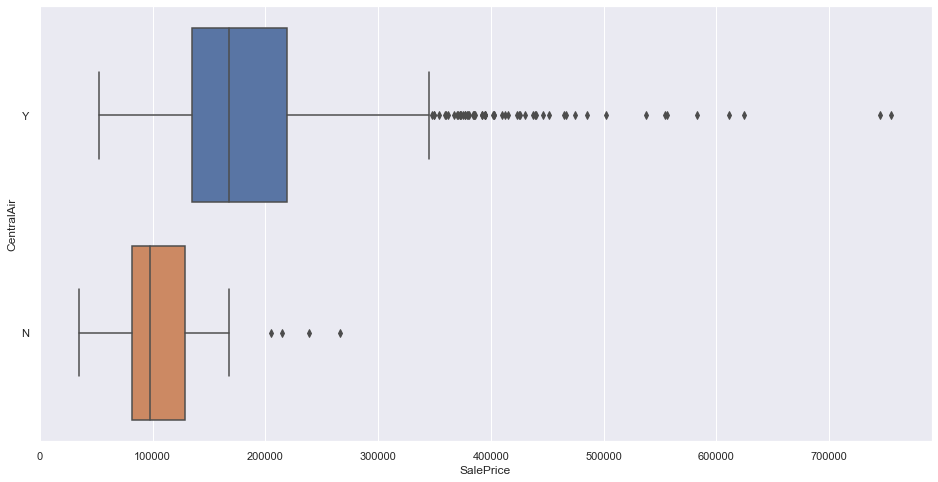

In [4]:
f, axes = plt.subplots(1, 1, figsize=(16, 8))
sb.boxplot(x = 'SalePrice', y = 'CentralAir', data = houseData)

<AxesSubplot:xlabel='SalePrice', ylabel='CentralAir'>

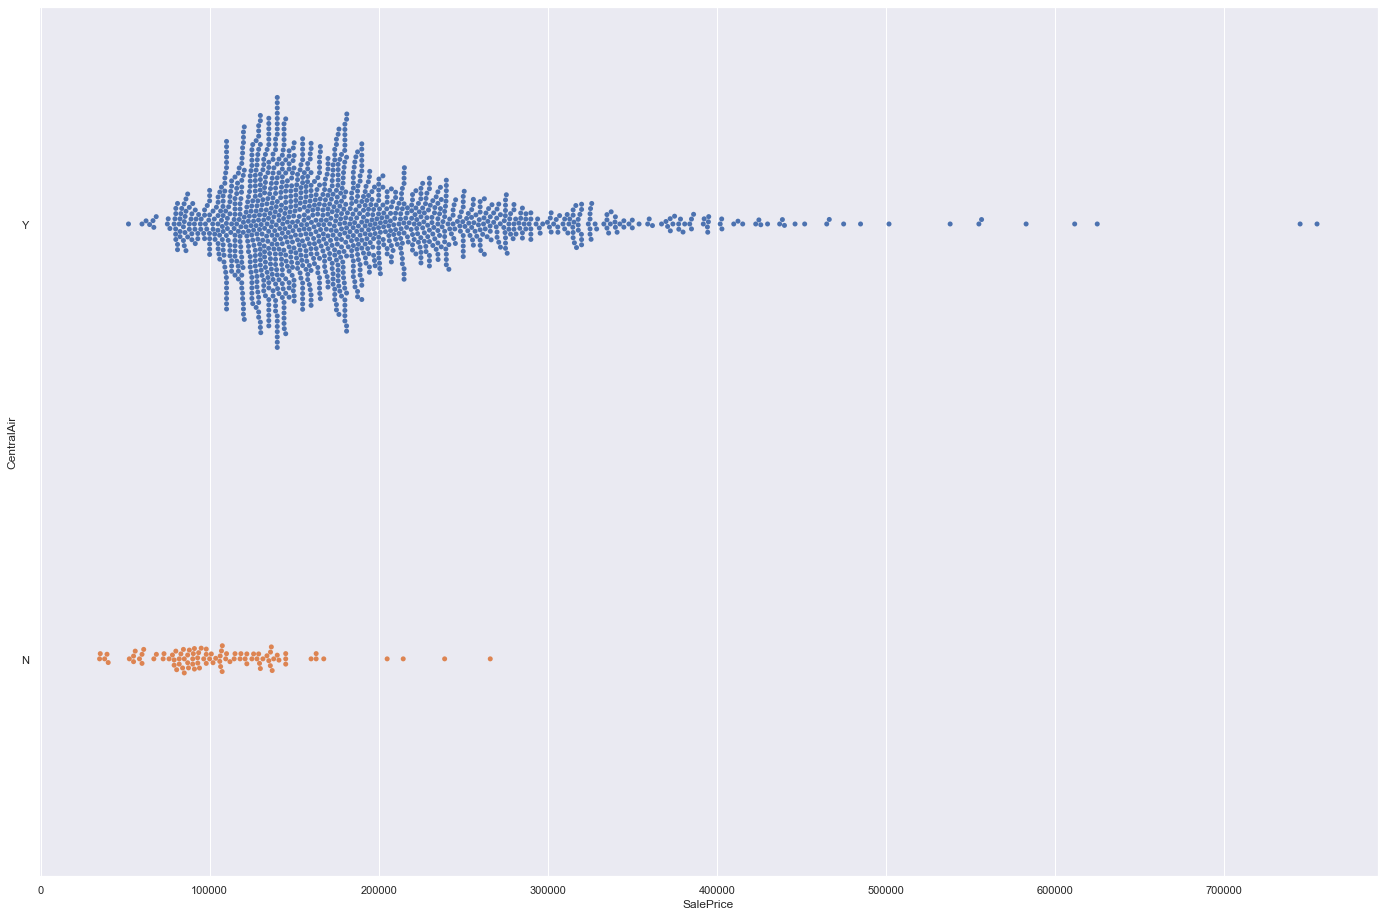

In [5]:
f, axes = plt.subplots(1, 1, figsize=(24, 16))
sb.swarmplot(x = 'SalePrice', y = 'CentralAir', data = houseData)

A swamplot will be much more useful to determine and visualise where to do the classification

#### Question part iii)
Import Classification Tree model from Scikit-Learn : from sklearn.tree import DecisionTreeClassifier

This is done at the start of the notebook

#### Question 1 Part iv)
Partition the complete dataset houseData into houseData_train (1100 rows) and houseData_test (360 rows)

In [6]:
houseData_train, houseData_test = pd.DataFrame(houseData[:1100]), pd.DataFrame(houseData[-360:])
print("Train Set\t:", houseData_train.shape)
print("Test Set\t:", houseData_test.shape)

Train Set	: (1100, 81)
Test Set	: (360, 81)


#### Question 1 Part v) <br>
Training : Fit a Decision Tree model for classification of CentralAir using SalePrice using the following variables.<br><br>y_train = pd.DataFrame(houseData_train['CentralAir'])<br><br>x_train = pd.DataFrame(houseData_train['SalePrice'])

In [7]:
dectree = DecisionTreeClassifier(max_depth = 2)

In [8]:
y_train, X_train = pd.DataFrame(houseData_train['CentralAir']), pd.DataFrame(houseData_train['SalePrice'])

In [9]:
dectree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

#### Question 1 Part vi)¶
Visualize the Decision Tree model using graphviz (needs the packages to be installed; check if they are installed).

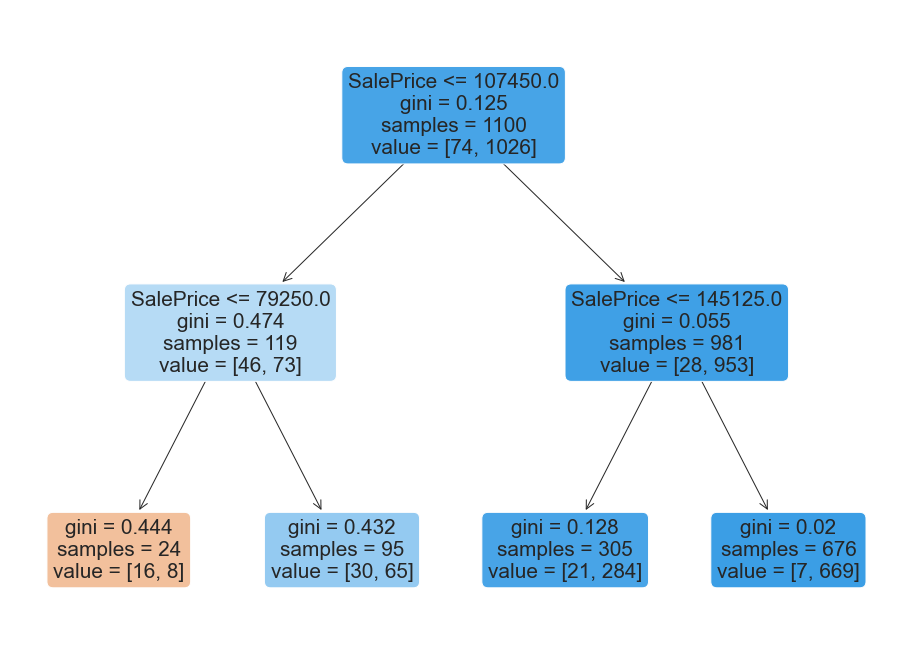

In [10]:
from sklearn.tree import plot_tree

f, axes = plt.subplots(1, 1, figsize=(16, 12))  
plot_tree(dectree, filled=True, rounded = True, feature_names=X_train.columns)
plt.show()

#### Question 1 Part vii)
Predict CentralAir for the train dataset using the Decision Tree model, and plot the Two-Way Confusion Matrix.

In [11]:
y_train_pred = dectree.predict(X_train)

In [12]:
print("Classification Accuracy \t:", dectree.score(X_train, y_train))

Classification Accuracy 	: 0.94


<AxesSubplot:>

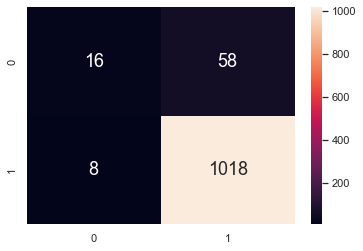

In [13]:
sb.heatmap(confusion_matrix(y_train, y_train_pred), 
           annot = True, 
           fmt=".0f", 
           annot_kws={"size": 18})

Classification Accuracy 	: 0.9472222222222222


<AxesSubplot:>

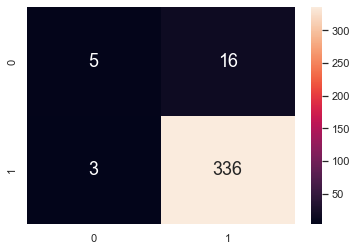

In [14]:
# Extract the two variables X_test and y_test
y_test = pd.DataFrame(houseData_test['CentralAir'])
X_test = pd.DataFrame(houseData_test['SalePrice'])

# Predict the Response corresponding to Predictors
y_test_pred = dectree.predict(X_test)

# Print the Classification Accuracy
print("Classification Accuracy \t:", dectree.score(X_test, y_test))

# Plot the two-way Confusion Matrix
sb.heatmap(confusion_matrix(y_test, y_test_pred),
           annot = True, 
           fmt=".0f", 
           annot_kws={"size": 18})

#### Question part viii) 
Print all the accuracy parameters of the decision tree model, including its Classification Accuracy, True Positive Rate, True Negative Rate, False Positive Rate and False Negative Rate, based on the aforesaid confusion matrix.

In [15]:
cm = confusion_matrix(y_test, y_test_pred)

In [16]:
print(cm)


[[  5  16]
 [  3 336]]


In [17]:
[[TN,FP],[FN,TP]] = cm

In [18]:
print("Classification Accuracy \t:", dectree.score(X_test, y_test))
print("True Negative \t:", TN)
print("True Positive \t:", TP)
print("False Negative \t:", FP)
print("False Positive \t:", FP)

Classification Accuracy 	: 0.9472222222222222
True Negative 	: 5
True Positive 	: 336
False Negative 	: 16
False Positive 	: 16


## Problem 2: Predicting CentralAir using Other Variables
Use the other variables from the dataset to predict CentralAir , as mentioned in the problem. This strategy also solves the bonus problem.

Use functions to replicate the predictions

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import plot_tree

def ClassProcedure(predictor_any, response_str = 'CentralAir'):

    y = pd.DataFrame(houseData[response_str])
    X = pd.DataFrame(houseData[predictor_any])
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 360)

    dectree = DecisionTreeClassifier(max_depth = 2) 
    dectree.fit(X_train, y_train) 
    y_train_pred = dectree.predict(X_train)
    y_test_pred = dectree.predict(X_test)

    print("Goodness of Fit of Model \tTrain Dataset")
    print("Classification Accuracy \t\n:", dectree.score(X_train, y_train))

    print("Goodness of Fit of Model \tTest Dataset")
    print("Classification Accuracy \t\n:", dectree.score(X_test, y_test))


    f, axes = plt.subplots(1, 2, figsize=(12, 4))
    sb.heatmap(confusion_matrix(y_train, y_train_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[0])
    sb.heatmap(confusion_matrix(y_test, y_test_pred), annot = True, fmt=".0f", annot_kws={"size": 18}, ax = axes[1])

    f, axes = plt.subplots(1, 1, figsize=(16, 12))  
    plot_tree(dectree, filled=True, rounded = True, feature_names=X_train.columns)
    plt.show()
    cm_train = confusion_matrix(y_train, y_train_pred)
    [[TN1,FP1],[FN1,TP1]] = cm_train
    print("Train Set:")
    print("Classification Accuracy \t:", dectree.score(X_train, y_train))
    print("True Negative \t:", TN1)
    print("True Positive \t:", TP1)
    print("False Negative \t:", FN1)
    print("False Positive \t:", FP1)
    print("\n")
    cm_test = confusion_matrix(y_test, y_test_pred)
    [[TN2,FP2],[FN2,TP2]] = cm_test
    print("Test Set")
    print("Classification Accuracy \t:", dectree.score(X_test, y_test))
    print("True Negative \t:", TN2)
    print("True Positive \t:", TP2)
    print("False Negative \t:", FN2)
    print("False Positive \t:", FP2)

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.9354545454545454
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.9444444444444444


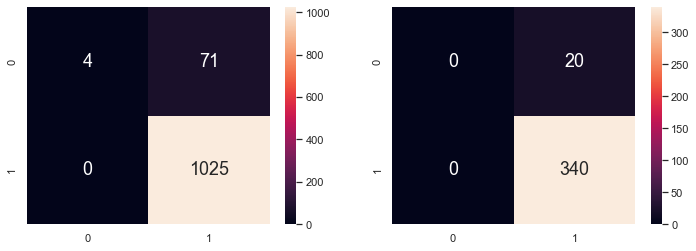

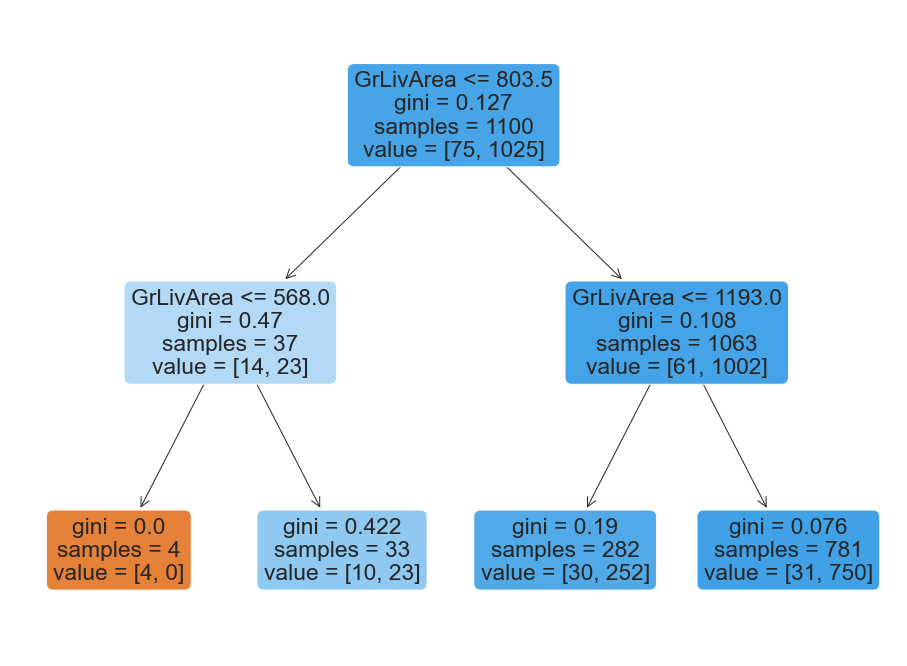

Train Set:
Classification Accuracy 	: 0.9354545454545454
True Negative 	: 4
True Positive 	: 1025
False Negative 	: 0
False Positive 	: 71


Test Set
Classification Accuracy 	: 0.9444444444444444
True Negative 	: 0
True Positive 	: 340
False Negative 	: 0
False Positive 	: 20


In [20]:
ClassProcedure('GrLivArea')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.9363636363636364
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.9305555555555556


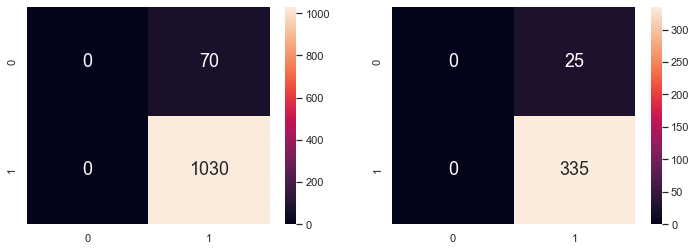

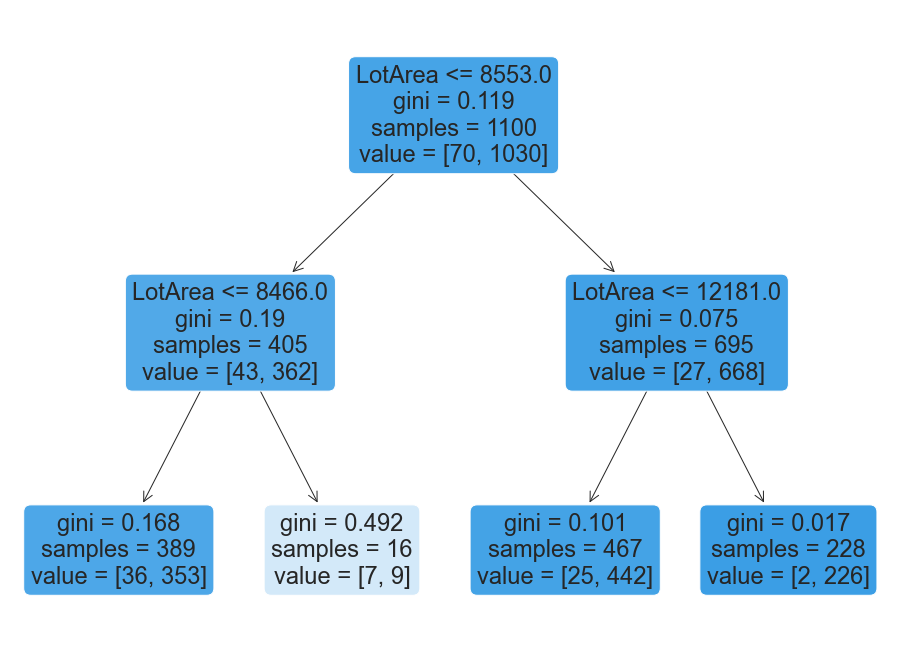

Train Set:
Classification Accuracy 	: 0.9363636363636364
True Negative 	: 0
True Positive 	: 1030
False Negative 	: 0
False Positive 	: 70


Test Set
Classification Accuracy 	: 0.9305555555555556
True Negative 	: 0
True Positive 	: 335
False Negative 	: 0
False Positive 	: 25


In [21]:
ClassProcedure('LotArea')

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.9418181818181818
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.9166666666666666


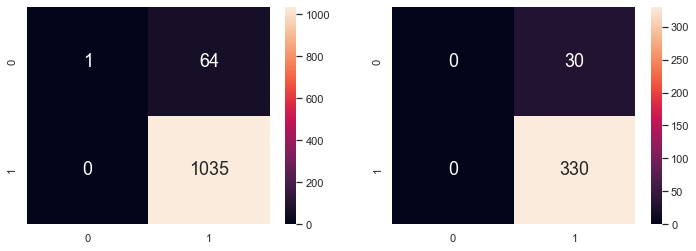

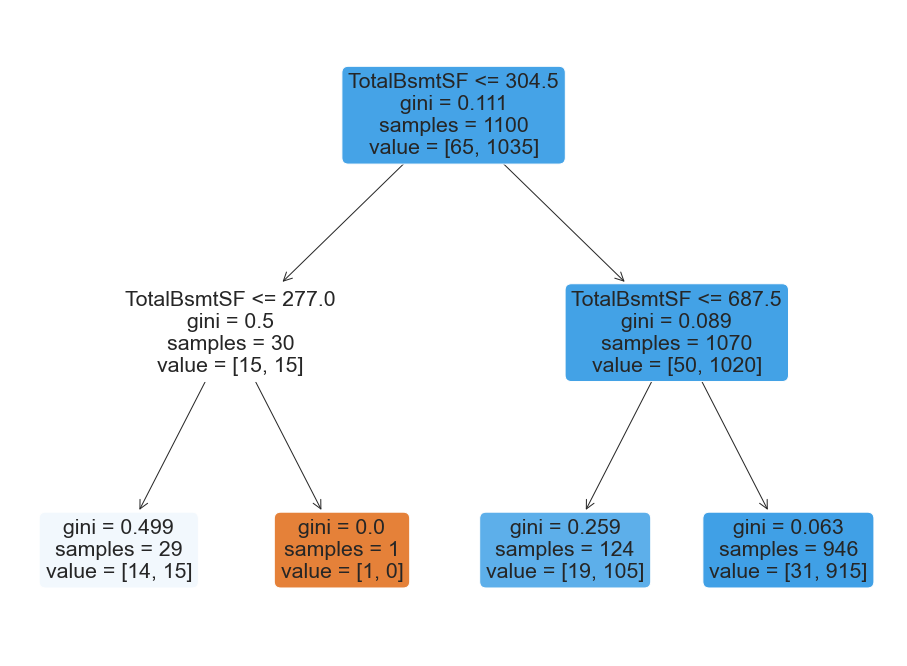

Train Set:
Classification Accuracy 	: 0.9418181818181818
True Negative 	: 1
True Positive 	: 1035
False Negative 	: 0
False Positive 	: 64


Test Set
Classification Accuracy 	: 0.9166666666666666
True Negative 	: 0
True Positive 	: 330
False Negative 	: 0
False Positive 	: 30


In [22]:
ClassProcedure('TotalBsmtSF')

In conclusion, classification accuracy is not enough to determine the best model. It is vital to use the confusion matrix to help us determine the best model. GrLivArea is the best model as it has the highest classification accuracy and the highest number of true positive rate and true negative rate.

## Bonus Question

Goodness of Fit of Model 	Train Dataset
Classification Accuracy 	
: 0.93
Goodness of Fit of Model 	Test Dataset
Classification Accuracy 	
: 0.95


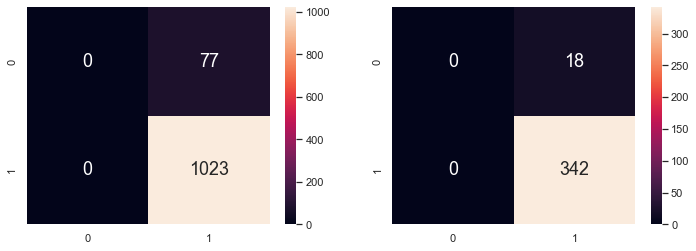

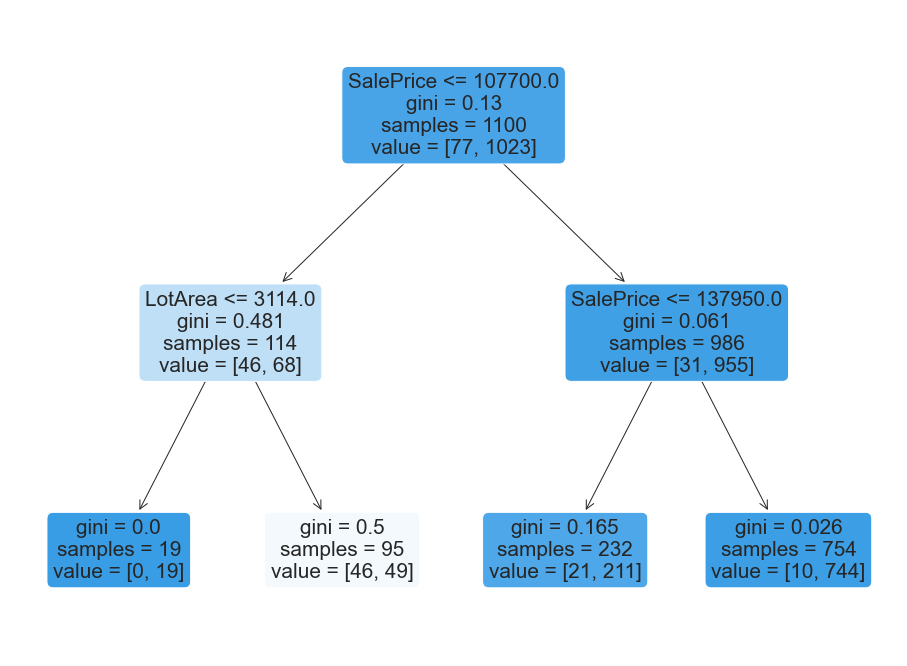

Train Set:
Classification Accuracy 	: 0.93
True Negative 	: 0
True Positive 	: 1023
False Negative 	: 0
False Positive 	: 77


Test Set
Classification Accuracy 	: 0.95
True Negative 	: 0
True Positive 	: 342
False Negative 	: 0
False Positive 	: 18


In [23]:
ClassProcedure(['SalePrice', 'GrLivArea', 'LotArea', 'TotalBsmtSF'])